In [49]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import pandas as pd
import datetime

In [51]:
image_collection = io.imread_collection('E:/TSA/Arasbaran_NDVI/*tif')
print('Image Collection Shape : ', np.shape(image_collection))
print('Image Collection Size : ', np.size(image_collection))

Image Collection Shape :  (230, 220, 321)
Image Collection Size :  16242600


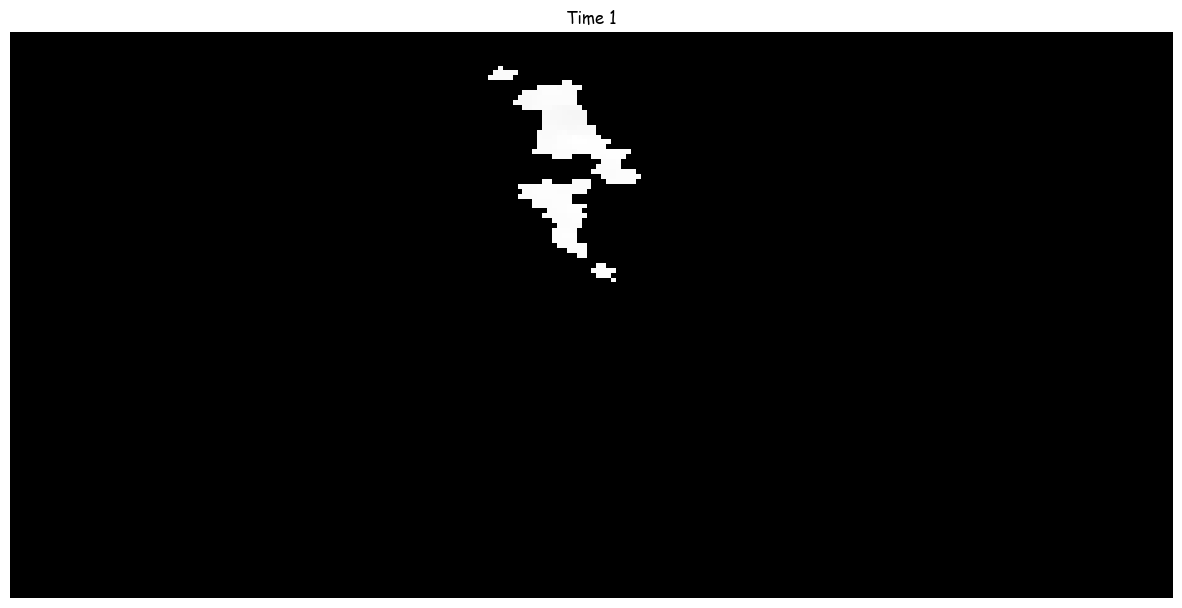

In [52]:
plt.figure(figsize=(15,10))
plt.imshow(image_collection[1], cmap='gray')
plt.title('Time 1')
plt.axis('off')
plt.show()

In [53]:
all_images = io.concatenate_images(image_collection)
data = all_images.reshape(all_images.shape[0], -1)

In [54]:
print('Reshape Image Collection Shape : ', np.shape(data) )

Reshape Image Collection Shape :  (3640, 27140)


In [55]:
rescale = data / 10000
print('Rescale Images : ', np.shape(rescale))

Rescale Images :  (3640, 27140)


In [56]:
arr = np.array(image_collection)
nums = np.count_nonzero(rescale >=0.5, axis=1)

In [57]:
print('Minimum Value : ',np.min(nums) )
print('Maximum Value : ',np.max(nums) )

Minimum Value :  0
Maximum Value :  27140


In [58]:
dates = [i.split('doy')[1].split('_')[0] for i in image_collection.files]

In [59]:
print('Start Date : ', dates[0])
print('End Date : ', dates[-1])

Start Date :  2010001
End Date :  2020001


In [60]:
df = pd.DataFrame()
df['Values(Km^2)'] = nums * 0.5 * 0.5
df['date'] = dates

In [61]:
def convert(date):
    new_date = datetime.datetime.strptime(str(date), '%Y%j')
    return new_date

In [62]:
df['date'] = df['date'].apply(convert)

In [63]:
print(df.head(5))

   Values(Km^2)       date
0       2402.75 2010-01-01
1         88.50 2010-01-02
2       6158.25 2010-01-03
3       6696.25 2010-01-04
4       3703.00 2010-01-05


In [65]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Comic Sans MS'

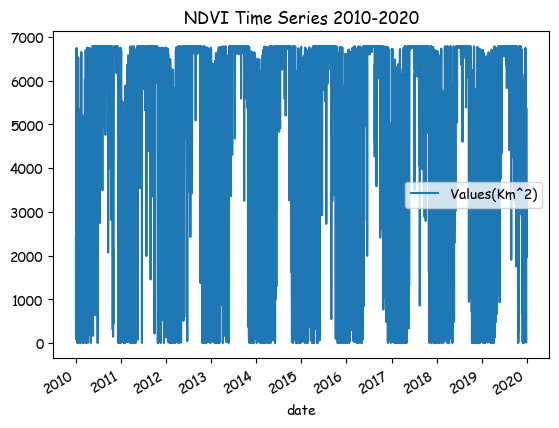

In [66]:
df.plot(x='date', y='Values(Km^2)')
plt.title('NDVI Time Series 2010-2020')
plt.show()

In [67]:
df.to_csv('E:/TSA/Arasbaran_NDVI/NDVI_Stat.csv')